In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


# Plot R2 activity data

In [2]:
import pandas as pd

R2_act_xls_path = 'data/round2/wet-lab/R2_activity.xlsx'

df_R2 = pd.read_csv(R2_act_xls_path + '.csv')
df_R2['Source'] = 'R2'
df_R2.sort_values('activity', ascending=True, inplace=True)
print(len(df_R2), len(df_R2[df_R2.activity > 1]))
df_R2.head()

1398 1171


,chip_loc,activity,chip_loc_id,Source
551,R2-6-D-11,0.021132,R2-6-47,R2
331,R2-4-D-06,0.024420,R2-4-42,R2
484,R2-6-A-03,0.030050,R2-6-3,R2
500,R2-6-A-05,0.033002,R2-6-5,R2
630,R2-7-C-09,0.033062,R2-7-33,R2


## Dot plots

In [3]:
import pandas as pd
from utils import plot_style_utils

def plot_data_dot_plots(df_data_to_plot, save_path='figures/round2/wetlab1_R2_activity_merged', figsize=(16, 5), improving_ratio=None, ratio_loc=(0, 1.5), label_y=4.0):
    plot_style_utils.set_pub_plot_context(context="talk")
    fig, ax = plot_style_utils.simple_ax(figsize=figsize)
    plot_style_utils.prettify_ax(ax)

    val_index = list(range(len(df_data_to_plot)))
    ax.plot(val_index, df_data_to_plot['activity'], 'o',  markersize=3, color='black')

    ax.set_ylabel('Fold improvement')
    ax.set_xlabel('# of samples')
    # add library annotations above the dots
    x_labels = list(df_data_to_plot['Source'].unique())
    n_values = [len(df_data_to_plot[df_data_to_plot['Source'] == source]) for source in x_labels]
    x_loc = [sum(n_values[:i]) + n_values[i]//2 if i > 0 else n_values[i]//2  for i in range(len(n_values))]

    if improving_ratio is not None:
        ax.text(ratio_loc[0], ratio_loc[1], f'Improving ratio: {improving_ratio*100:.1f}%', ha='center')

    for i, x in enumerate(x_loc):
        ax.text(x, label_y, x_labels[i], ha='center')
    
    ax.axhspan(0, 1, color=[0.8, 0.8, 0.8], alpha=0.5) ## HARD CODED
    ax.axhline(1, color='r', linestyle='--')
    ax.axhline(3, color='y', linestyle='--')
    ax.set_ylim([0, 7]) ## HARD CODED
    plot_style_utils.save_for_pub(fig, path=save_path)

Improving ratio: 0.8376251788268956


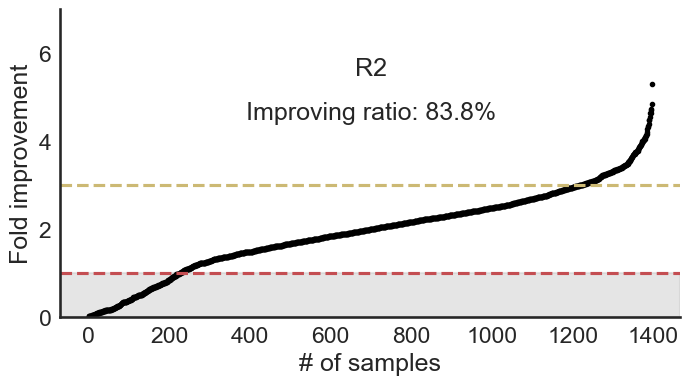

In [4]:
df_R2_data_to_plot = df_R2.copy()
# df_R2_data_to_plot = df_R2_data_to_plot.reset_index()
improving_ratio = len(df_R2_data_to_plot[df_R2_data_to_plot.activity > 1]) / len(df_R2_data_to_plot)
print(f'Improving ratio: {improving_ratio}')

plot_data_dot_plots(df_R2_data_to_plot, save_path='figures/round2/wetlab2_R2_activity', figsize=(8, 4), improving_ratio=improving_ratio, ratio_loc=(700, 4.5), label_y=5.5)